# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW2 - Multilayer NNs and Convolutional NNs
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Student 1| student_1@campus.technion.ac.il| 123456789|
|Student 2| student_2@campus.technion.ac.il| 987654321|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw2_id1_id2.ipynb`.
    * If you answered the questions in a different file you should submit a `.zip` file with the name `ece046211_hw2_id1_id2.zip` with content:
        * `ece046211_hw2_id1_id2.ipynb` - the code tasks
        * `ece046211_hw2_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw2` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Generalization in A Teacher-Student Setup](#-Question-1--Generalization-in-A-Teacher-Student-Setup)
    * [Q2 - "Typical" Generalization in Multilayer Neural Networks](#-Question-2---"Typical"-Generalization-in-Multilayer-Neural-Networks)
    * [Q3 - Deep Double Descent](#-Question-3---Deep-Double-Descent)
    * [Q4 - Initialization](#-Question-4---Initialization)
    * [Q5 - Equivariance](#-Question-5---Equivariance)
    * [Q6 - VGG Architecture](#-Question-6--VGG-Architecture)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Importance of Activation and Initialization](#-Task-1---The-Importance-of-Activation-and-Initialization)
    * [Task 2 - MLP-based Deep Classifer](#-Task-2---MLP-based-Deep-Classifer)
    * [Task 3 - Design a CNN](#-Task-3---Design-a-CNN)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Generalization in A Teacher-Student Setup
---

Recall from lecture 4 the Bayes Risk $\mathcal{\overline{R}}(w)$: $$ \mathcal{\overline{R}}(w) \triangleq \mathbb{E}_{\epsilon \sim \mathcal{N}(0, \sigma_{\epsilon}^2I), w_{true} \sim \mathcal{N}(0,\frac{\sigma_w^2}{d}I) } \left[\mathcal{R}\right], $$ where, $$ \mathcal{R}(w_{\mu}) = ||w_{\mu}-w_{true}||^2 = ||(H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon||^2 $$

Prove:

$$ \overline{\mathcal{R}}(w_{\mu}) = \sum_{i=1}^d \frac{(\sigma_w^2/d) \mu^2 + \sigma_{\epsilon}^2 \lambda_i}{(\lambda_i + \mu)^2} $$

Hints:
* $\mathbb{E} \left[\epsilon^TXH_{\mu}^{-1}H_{\mu}^{-1}X^T\epsilon \right] = \sum_{i,j}^N\mathbb{E}[\epsilon_i \epsilon_j] \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_j$

* $\mathbb{E}[\epsilon_i \epsilon_j] = \sigma_{\epsilon}^2 \delta_{ij}$

* $\sum_{i=1}^N \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_i = Tr\left[XH_{\mu}^{-2}X^T \right] $

## Answer - Question 1
$ 
\overline{\mathcal{R}}(w_{\mu}) = E_{w_{true},\epsilon}||w_{\mu}-w_{true}||^2 = E_{w_{true},\epsilon}||(H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon||^2=\\
=E_{w_{true}}\left[w_{true}^T(H_{\mu}^{-1}H-I)^T(H_{\mu}^{-1}H-I)w_{true}\right]+
\underbrace{E_{w_{true},\epsilon}\left[2w_{true}^T(H_{\mu}^{-1}H-I)^TH_{\mu}^{-1}X^T\epsilon\right]}_{=0\;\;w_{true}\perp\epsilon}+
E_{\epsilon}\left[\epsilon^TXH_{\mu}^{-T}H_{\mu}^{-1}X^T\epsilon\right]\underset{(*)}{=}
$  
Since $H_{\mu}$ is a symmetric matrix and since multiplying/inverting symmetric matrices also keeps the symmetry property:  
$
\underset{(*)}{=}E_{w_{true}}\left[w_{true}^T(H_{\mu}^{-1}H-I)^2w_{true}\right]+E_{\epsilon}\left[\epsilon^TXH_{\mu}^{-2}X^T\epsilon\right]\underset{Tr(scalar)=scalar}{=}\\
=E_{w_{true}}\left[Tr(w_{true}^T(H_{\mu}^{-1}H-I)^2w_{true})\right]+E_{\epsilon}\left[Tr(\epsilon^TXH_{\mu}^{-2}X^T\epsilon)\right]\underset{Trace\;cyclic\;property}{=}\\
=E_{w_{true}}\left[Tr((H_{\mu}^{-1}H-I)^2w_{true}w_{true}^T)\right]+E_{\epsilon}\left[Tr(XH_{\mu}^{-2}X^T\epsilon\epsilon^T)\right]\underset{Trace\;and\;expectation\;linearity}{=}\\
=Tr((H_{\mu}^{-1}H-I)^2E_{w_{true}}\left[w_{true}w_{true}^T\right])+Tr(XH_{\mu}^{-2}X^TE_{\epsilon}\left[\epsilon\epsilon^T\right])=\\
=\frac{\sigma^{2}_{\omega}}{d}Tr((H_{\mu}^{-1}H-I)^2)+\sigma^{2}_{\epsilon}Tr(XH_{\mu}^{-2}X^T)\underset{Trace\;cyclic\;property}{=}\\
=\frac{\sigma^{2}_{\omega}}{d}Tr((H_{\mu}^{-1}H-I)^2)+\sigma^{2}_{\epsilon}Tr(H_{\mu}^{-2}H)\underset{(**)}{=}
$   
Notice that:  
$
H_{\mu}=\mu I+H\underset{spectral\;the.}{=}\mu I+U\Lambda U^T=U(\mu I+\Lambda)U^T\\
\Longrightarrow [\lambda_{H_{\mu}}]_{i}=\mu+\lambda_{i}
$  
Thus:  
$
\underset{(**)}{=}\frac{\sigma^{2}_{\omega}}{d}Tr((U(\mu I+\Lambda)^{-1}\underbrace{U^TU}_{=I}\Lambda U^T-\underbrace{I}_{=UU^T})^2)+\sigma^{2}_{\epsilon}Tr(U(\mu I+\Lambda)^{-2}\underbrace{U^TU}_{=I}\Lambda U^T)=\\
=\frac{\sigma^{2}_{\omega}}{d}Tr((U((\mu I+\Lambda)^{-1}\Lambda-I) U^T)^2)+\sigma^{2}_{\epsilon}Tr(U(\mu I+\Lambda)^{-2}\Lambda U^T)=\\
=\frac{\sigma^{2}_{\omega}}{d}Tr(U((\mu I+\Lambda)^{-1}\Lambda-I)^2 U^T)+\sigma^{2}_{\epsilon}Tr(U(\mu I+\Lambda)^{-2}\Lambda U^T)\underset{Trace\;cyclic\;property,\;U^TU=I}{=}\\
=\frac{\sigma^{2}_{\omega}}{d}Tr(((\mu I+\Lambda)^{-1}\Lambda-I)^2)+\sigma^{2}_{\epsilon}Tr((\mu I+\Lambda)^{-2}\Lambda)\underset{(***)}{=}
$  
Where,    
$
[((\mu I+\Lambda)^{-1}\Lambda-I)^2]_{i}=\left(\frac{\lambda_{i}}{\mu+\lambda_{i}}-1\right)^2=\frac{\mu^2}{(\mu+\lambda_{i})^2}\\
[(\mu I+\Lambda)^{-2}\Lambda]_{i}=\frac{\lambda_{i}}{(\mu+\lambda_{i})^2}
$     
Returning to $(***)$:   
$
\underset{(***)}{=} \frac{\sigma^{2}_{\omega}}{d}\sum_{i=1}^d\frac{\mu^2}{(\mu+\lambda_{i})^2}+\sigma^{2}_{\epsilon}\sum_{i=1}^d\frac{\lambda_{i}}{(\mu+\lambda_{i})^2}=\\
=\sum_{i=1}^d\frac{\frac{\sigma^{2}_{\omega}}{d}\mu^2+\sigma^{2}_{\epsilon}\lambda_{i}}{(\mu+\lambda_{i})^2}
$

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - "Typical" Generalization in Multilayer Neural Networks
---


We examine a "student" neural network  $f_{\mathbf{w}}\left(\mathbf{x}\right)$ with parameter vector $\mathbf{w}\in\mathbb{R}^{k}$ and input $\mathbf{x}\in\mathbb{R}^{d_{0}}$  used in a binary classification problem where the training set is $\mathcal{S}=\left\{ \mathbf{x}^{\left(n\right)}\right\} _{n=1}^{N}$ sampled i.i.d. from $P_{X}$, where the binary $\left(\pm1\right)$ labels are generated by a "teacher" neural network $f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)$ with the same architecture. To understand the "typical" generalization of the student, we examine the following "Guess and Check" algorithm to learn its weights: we randomly sample parameters vectors $\mathbf{w}_{1},\mathbf{w}_{2},...$ i.i.d.from $P_{W}$, in which each parameter is sampled independently from a uniform distribution over $Q=\left\{ -\left(q-1\right)/2,\dots,-1,0,1,\dots,\left(q-1\right)/2\right\} $ quantization levels, where $q=\left|Q\right|$ is an odd positive number. We do this until a stopping time $t$ in which we perfectly fit the dataset: $\forall n:f_{\mathbf{w}_{t}}\left(\mathbf{x}^{\left(n\right)}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}^{\left(n\right)}\right)$. We examine a two-layer neural network with $d_{1}$ hidden neurons
$$
f_{\mathbf{w}}\left(\mathbf{x}\right)=\mathrm{sign}\left(\mathbf{w}_{2}^{\top}\left[\mathbf{W}_{1}\mathbf{x}\right]_{+}\right)
$$
where $\left[\cdot\right]_{+}$ is the ReLU activation function, the teacher has at most $d_{1}^{\star}<d_{1}$ non-zero neurons (i.e., the other $d_{1}-d_{1}^{\star}$ hidden neurons in the teacher to have all the incoming and outgoing weights equal to zero). Each of the teacher's weights are also in $Q$.

1. Calculate the probability $P_{\mathbf{w}\sim P_{W}}\left(\mathbf{w}=\mathbf{w}_{\star}\right).$
2. Prove that $\begin{equation}
(1) \:\:p_{\star}\triangleq P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w}}\left(\mathbf{x}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)\geq q^{-d_{0}d_{1}^{*}-d_{1}}\,.
\end{equation}$
3. Show that for any constant $T>0$, we can bound the probability of stopping time $t>T$ as $\begin{equation} (2) \:\:
\left\lfloor T\right\rfloor \leq\frac{\log P\left(t>T\right)}{\log\left(1-p_{\star}\right)}\,.
\end{equation}$
4. Prove the generalization bound:<br>
   **Theorem 1** *With probability* $\left(1-\eta\right)\left(1-\delta\right)$, $\begin{equation}(3) \:\:
\epsilon<\frac{\left(d_{0}d_{1}^{\star}+d_{1}\right)\log q+\log\frac{1}{\delta}+\log\log\frac{1}{\eta}}{N}
\end{equation}$ **Hint**: Combine the results from previous sections, using the approximations $\left\lfloor T\right\rfloor \approx T$ and $\log\left(1-p_{\star}\right)\approx-p_{\star}$ (treat these approximations as exact), and the following basic generalization
 bound (which we learned in class):<br>
     **Theorem 2** *For any* $f\in\left|\mathcal{F}\right|$ $f\in\left|\mathcal{F}\right|$, *with probability* $1-\delta$, $\begin{equation} (4) \:\:
\epsilon\triangleq\mathbb{P}_{\mathbf{x}}\left(f_{\mathbf{w}}\left(\mathbf{x}\right)\neq f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)<\frac{\log\left|\mathcal{F}\right|+\log\frac{1}{\delta}}{N}\,.
\end{equation}$
5. Is the bound in eq. $(3)$ better than the bound in eq. $(4)$ in which $\mathcal{F}=\left\{ f_{\mathbf{w}}:\mathbf{w}\in Q^{k}\right\} $  is the student hypothesis class (in which each parameter can have one of $q$ values)? Explain and ignore the (negligble) $\log\log\frac{1}{\eta}$ term.

## Answer - Question 2
### Q2 - Section 1
Notice that in the current section the demand is $[W_1]_{(d_1^*+1):d_1,j}=0$.  
These values doesn't change the final function value, if  $[w_2]_{(d_1^*+1):d_1}=0$.  
If this is indeed the demand(Else handled in the next section), each parameter must get a certain value.  
Also each parameter is sampled idependenly from an identical uniform discrete distribution with q elements.  
$
P(w=w^*)=\prod_{i=1}^{d_0d_1+d_1}P(w_i=w_i^*)=\prod_{i=1}^{d_0d_1+d_1}q^{-1}=q^{-d_0d_1-d_1}
$
### Q2 - Section 2
Unlike the former section, here the demand is function equality, meaning a sufficient demand is $[W_1]_{1:d_1^*,j}=[W_1^*]_{1:d_1^*,j},w_2=w_2^*$.  
$(*)$ Notice that this demand isn't essential. For example  if $[w_2^*]_1=0$ also than the entire first row of $W_1$ can get any value. Such corelations cause the actual probability of functions equality being larger than the probability of the sufficient demand.  
$
p_{\star}\triangleq P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w}}\left(\mathbf{x}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)\underset{(*)}{\geq}
P_{\mathbf{w}\sim P_{W}}\left([W_1]_{1:d_1^*,j}=[W_1^*]_{1:d_1^*,j},w_2=w_2^*\right)=\\
=\left(\prod_{i=1}^{d_1^*}\prod_{j=1}^{d_0}P([W_1]_{i,j}=[W_1^*]_{i,j})\right)\prod_{i=1}^{1:d_1}P([w_2]_i=[w_2^*]_i)=\left(\prod_{i=1}^{d_1^*}\prod_{j=1}^{d_0}q^{-1}\right)\prod_{i=1}^{1:d_1}q^{-1}=\\
=q^{-d_`^*d_0-d_1}
$
### Q2 - Section 3
$
P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w}}\left(\mathbf{x}\right)\neq f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)=1-P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w}}\left(\mathbf{x}\right)= f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)\leq 1-p_{\star}\\
\eta\triangleq P(t>T)= \prod_{t=1}^{\left\lfloor T\right\rfloor}P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w_t}}\left(\mathbf{x}\right)\neq f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)\leq (1-p_{\star})^{\left\lfloor T\right\rfloor}
$  
Assuming a non trivial search $p_{\star} \neq 1$ and also since it is given that there exist $t$ such that $w_t=w^*$ $p_{\star} \neq 0$.   
This means $0<p_{\star}<1$ thus applying log on both the inequality side we get that:  
$
log(P(t>T))\leq{\left\lfloor T\right\rfloor}log(1-p_{\star})
$  
Since $0<p_{\star}<1$ the right term $-\infty<log(1-p_{\star})<0$ thus:  
$
{\left\lfloor T\right\rfloor}\leq \frac{log(P(t>T))}{log(1-p_{\star})}=\frac{\eta}{log(1-p_{\star})}
$  
### Q2 - Section 4
As was explained the lecture 4(MLP) assuming $t<T$ and with probability $(1-\delta)(1-\eta)$:  
$
\varepsilon<\frac{log|\mathcal{F}_T|-log\delta}{N}\underset{\substack{\mathcal{F}_T={f_{w_t}}_{t=1}^T \\ thus |\mathcal{F}_T|=T}}{=} \frac{logT-log\delta}{N}\approx \frac{log{\left\lfloor T\right\rfloor}-log\delta}{N}\underset{Section\;3}{\leq} \frac{log\left(\frac{\eta}{log(1-p_{\star})}\right)-log\delta}{N} \approx \\ 
\approx\frac{log\left(\frac{\eta}{-p_{\star}}\right)-log\delta}{N}=\frac{-logp_{\star}+log{\frac{1}{\delta}}+loglog\frac{1}{\eta}}{N}\underset{Section\;2}{\leq}
\frac{\left(d_{0}d_{1}^{\star}+d_{1}\right)log q+log\frac{1}{\delta}+loglog\frac{1}{\eta}}{N}
$  
### Q2 - Section 5
The question boils to the following:  
$
\left(d_{0}d_{1}^{\star}+d_{1}\right)log q \overset{?}{\leq} log|\mathcal{F}|=logq^k=klogq
$  
if q=1 then the oppositing terms are equal else(q>1):  
$
d_{0}d_{1}^{\star}+d_{1}\overset{?}{\leq}k=d_0d_1+d_1\\
d_{0}d_{1}^{\star}\overset{?}{\leq}d_0d_1
$  
Assuming $d_0\geq 1$:  
$
d_{1}^{\star}\overset{V}{\leq}d_1
$  
Thus the suggested bound (3) is tighter(better) than bound (4).

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Deep Double Descent
---

For the following plots:
1. Where is the critical point (the point of transition between the "Classical Regime" and "Modern Regime") of the deep double descent?
2. What type of double descent is shown (**look closely at the graph**)? Explain. There can be more than one correct answer.
    

a. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_transformer.PNG' style="height:300px">

b. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_resnet.PNG' style="height:400px">

c. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_intermediate.PNG' style="height:300px">

## Answer - Question 3
### Q3 - Section 1
The answer to this section is in the appendix(PDF file submitted).
### Q3 - Section 2
Figure a - Model size double decent.  
Figure b - Model size double decent. We can also see that the double decent is less profitable(Risk-wise), when the label noise is higher(Should add regularization).    
Figure c - Training time double decent. We can also see that the double decent arrives later(Not at all?) and is less profitable(Risk-wise) for narrower models.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 - Initialization
---
Recall that in lecture 5 we were discussing how to calculate the initialization variance, and reached the conclusion that $$ \sigma_l =\frac{1}{\sqrt{\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}} $$
Show that for ReLU activation ($\varphi(z) = max(0,z)$), the optimal variance satisfies: $$ \sigma_l = \sqrt{\frac{2}{d_{l-1}}}$$

1. Under the assumption that the distribution of $W$ is symmetric ($\to$ the distribution of $u$ is symmetric).
2. Using the central limit theorem for large width.

Answer each section **separately** and assume the sections are independent.

All the notations are the same as in the lecture slides.

## Answer - Question 4
### Q4 - Section 1
Using the assumption that the distribution of $u_{l-1}$ is symmetric:  
$
\mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]=\int_{-\infty}^{\infty} \varphi^2([u_{l-1}]_j)f([u_{l-1}]_j)d[u_{l-1}]_j\underset{Relu}{=} \int_{0}^{\infty} [u_{l-1}]_j^2f([u_{l-1}]_j)d[u_{l-1}]_j\underset{\substack{[u_{l-1}]_j^2f([u_{l-1}]_j)\;is\;an\\even\;function}}{=} \\
=\frac{1}{2}\int_{-\infty}^{\infty} [u_{l-1}]_j^2f([u_{l-1}]_j)d[u_{l-1}]_j=\frac{1}{2}Var([u_{l-1}]_j)=\frac{1}{2}
$  
Thus:  
$  
\sigma_l =\frac{1}{\sqrt{\sum_{j=1}^{d_{l-1}} \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}}=\frac{1}{\sqrt{\sum_{j=1}^{d_{l-1}} \frac{1}{2}}}=\sqrt{\frac{2}{d_{l-1}}}
$

### Q4 - Section 2
As we saw in lecture 4(MLP), since we assume $u_{l-1}$ is a vector of iid elements using the central limit theorem:  
$
\sigma_l =\frac{1}{\sqrt{\sum_{j=1}^{d_{l-1}} \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}}\underset{d_{l-1}\to \infty}{\to} \frac{1}{\sqrt{d_{l-1}E_{z\sim\mathbb{N}(0,1)}\left[\varphi^2(z)\right]}}
$  
Isolating the expectation term for simplicity:   
$  
E_{z\sim\mathbb{N}(0,1)}\left[\varphi^2(z)\right]\underset{f(z)\;is\;a\;normal\;gaussian}{=}\int_{-\infty}^{\infty}\varphi^2(z)f(z)dz\underset{Relu}{=}\int_{0}^{\infty}z^2f(z)dz\underset{\substack{z^2f(z)\;is\;an\\even\;function}}{=}\frac{1}{2}\int_{-\infty}^{\infty}z^2f(z)dz=\frac{1}{2}Var(z)=\frac{1}{2}
$  
Thus:   
$
\sigma_l =\frac{1}{\sqrt{\sum_{j=1}^{d_{l-1}} \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}}\underset{d_{l-1}\to \infty}{\to} \frac{1}{\sqrt{d_{l-1}E_{z\sim\mathbb{N}(0,1)}\left[\varphi^2(z)\right]}}=\sqrt{\frac{2}{d_{l-1}}}
$

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 5 - Equivariance
---

Recall from lecture 6:
A function $f: \mathbb{R}^d \to \mathbb{R}^d$ is equivariant if $f(\tau \cdot x) = \tau \cdot f(x)$ for all $\tau$.

Let $f_w(x) = \phi (Wx)$ where $\phi$ is a component-wise non-linearity and $W \in \mathbb{R}^{d\times d}$. Prove that $f_w:\mathbb{R}^d \to \mathbb{R}^d$ is equivariant to transformation family $H$ **if and only if**: $$ \forall \tau \in H, W[i, j] = W[\tau(i), \tau(j)] $$

* As in class, $\tau$ is an operator which re-arranges the terms in the vector it is operating on. $\tau(i)=j$ implies that component $i$ is mapped to component $j$. In addition, $\tau \cdot x$ means we use $\tau$ on $x$.
* Assume one-by-one activations (<a href="https://en.wikipedia.org/wiki/Injective_function">Injective functions/one-by-one</a>)

## Answer - Question 5
$
\underline{\Longleftarrow}: \\
[f_w(\tau\circ x)]_i=[\phi(W(\tau\circ x))]_i\underset{\phi\;component-wise\;func}{=} \phi([W(\tau\circ x)]_i)=\\
=\phi(\sum_{j=1}^d w_{ij}[\tau\circ x]_j)\underset{Assumption}{=}\phi(\sum_{j=1}^d w_{\tau(i)\tau(j)}x_{\tau(j)})\underset{Rearrange\;sum}{=}\\
=\phi(\sum_{j=1}^d w_{\tau(i)j}x_{j})=\phi([W(\tau\circ x)]_{\tau(i)})=[\phi(W(\tau\circ x))]_{\tau(i)}=[f_w(x)]_{\tau(i)}=[\tau\circ f_w(x)]_i
$  
  
$
\underline{\Longrightarrow}: \\
[f_w(\tau\circ x)]_i\overset{!}{=}[\tau\circ f_w(x)]_i=[f_w(x)]_{\tau(i)} \\ 
[\phi(W(\tau\circ x))]_i\overset{!}{=}[\phi(Wx)]_{\tau(i)}  \\
\phi([W(\tau\circ x)]_i)\overset{!}{=}\phi([Wx]_{\tau(i)}) \\
\phi(\sum_{j=1}^d w_{ij}x_{\tau(j)})=\phi(\sum_{j=1}^d w_{ij}[\tau\circ x]_j)\overset{!}{=}\phi(\sum_{j=1}^d w_{\tau(i)j}x_{j})
$  
Using $\phi$'s one-to-one activation assumption, we can retrace the source value inserted to it:  
$
\sum_{j=1}^d w_{ij}x_{\tau(j)}\overset{!}{=}\sum_{j=1}^d w_{\tau(i)j}x_{j}
$  
Define $k\triangleq \tau(j)$ and rearranging both sums according to it:  
$
\sum_{k=1}^d w_{i\tau^{-1}(k)}x_{k}\overset{!}{=}\sum_{k=1}^d w_{\tau(i)k}x_{k}
$  
This equality is possible for every x if and only if:  
$
w_{i\tau^{-1}(k)}\overset{!}{=}w_{\tau(i)k}
$  
Using $k\triangleq \tau(j)$ and $j=\tau^-1(k)$:  
$
w_{ij}\overset{!}{=}w_{\tau(i)\tau(j)}
$

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 6 -VGG Architecture
---

1. The VGG-11 CNN architecture consists of 11 convolution (CONV)/fully-connected (FC) layers (every CONV layer has the same padding and stride, every MAXPOOL layer is 2×2 and has padding of 0 and stride 2). Fill in the table. You need to **consider the bias**.


* CONV$M$-$N$: a convolutional layer of size $M \times M \times N$, where $M$ is the kernel size and $N$ is the number of filters. $stride=1, padding=1$. 
* POOL2: $2 \times 2$ Max Pooling with $stride=2$
    * In case the input of the layer is odd, you should round down. For example, if the output of the layer should be $3.5 \times 3.5 \times 3$, you should round to $3 \times 3 \times 3$ (i.e., ignore the last column of the input image when performing MaxPooling).
* FC-N: a fully connected layer with $N$ neurons.


| Layer  | Output Dimension  | Number of Parameters (Weights) |
|---|---|---|
| INPUT  |  224x224x3 | 0  |
|  CONV3-64 | -  | -  | 
| ReLU |  - | -  |
| POOL2|  - | -  |
|CONV3-128 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-256 | - | -|
|ReLU | - | -|
|CONV3-256 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-512 | - | -|
|ReLU | - | -|
|CONV3-512 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-512 | - | -|
|ReLU | - | -|
|CONV3-512 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
| FC-4096|  - | -  |
| FC-4096|  - | -  |
| FC-1000|  - | -  |
| SOFTMAX|  - | -  |

2. What is the total number of parameters? (use a calculator for this one)
3. What percentage of the weights are found in the fully-connected layers?

## Answer - Question 6
### Q6 - Section 1
| Layer  | Output Dimension  | Number of Parameters (Weights) |
|---|---|---|
| INPUT  |  224x224x3 | 0  |
|  CONV3-64 | 224X224X64  | 3X3X3X64+64  | 
| ReLU |  224X224X64 | 0  |
| POOL2|  112X112X64 | 0  |
|CONV3-128 | 112X112X128 | 3X3X64X128+128|
|ReLU | 112X112X128 | 0|
| POOL2|  56X56X128 | 0  |
|CONV3-256 | 56X56X256 | 3X3X128X256+256|
|ReLU | 56X56X256 | 0|
|CONV3-256 | 56X56X256 | 3X3X256X256+256|
|ReLU | 56X56X256 | 0|
| POOL2|  28X28X256 | 0  |
|CONV3-512 | 28X28X512 | 3X3X256X512+512|
|ReLU | 28X28X512 | 0|
|CONV3-512 | 28X28X512 | 3X3X512X512+512|
|ReLU | 28X28X512 | 0|
| POOL2|  14X14X512 | 0  |
|CONV3-512 | 14X14X512 | 3X3X512X512+512|
|ReLU | 14X14X512 | 0|
|CONV3-512 | 14X14X512 | 3X3X512X512+512|
|ReLU | 14X14X512 | 0|
| POOL2|  7X7X512 | 0  |
| FC-4096|  4096 | 7X7X512X4096 +4096|
| FC-4096|  4096 | 4096X4096+4096|
| FC-1000|  1000 | 4096X1000+1000|
| SOFTMAX|  1 | 0  |
### Q6 - Section 2
The sum of the weight column is 132,863,336 parameters.
### Q6 - Section 3
Convolution layers sum of weights is 9,220,480 parameters.  
FC layers sum of weights is 123,642,856 parameters.  
Meaning ~93.06% of the weights are in the fully connected layers.


### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

#### Tips
---
1. Uniformly distributed tensors - `torch.Tensor(dim1, dim2, ...,dimN).uniform_(-1, 1)`
2. Separation to **validation set** in PyTorch - <a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">See example here</a>.

In [85]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import copy
import pickle
import time
from operator import itemgetter
from kornia import augmentation as K
from kornia.augmentation import AugmentationSequential
import gc
# %matplotlib notebook
%matplotlib inline

seed = 3
np.random.seed(seed)
torch.manual_seed(seed)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Importance of Activation and Initialization
---
In this task, we are going to use $x \in \mathcal{R}^{512}$ and simple neural network that outputs $f(x) \in \mathcal{R}^{512}$. The network will have 100 layers with 512 units in each layer.

1. We initialize the weights from a unit normal distribution. Run the following code cell and explain what happens. Add a short piece of code that locates when it happens (hint: use `torch.isnan()`). **Print** the layer number.
2. We can demonstrate that at a given layer, the matrix product of inputs $x$ and weight matrix $a$ that is initialized from a standard normal distribution will, on average, have a standard deviation very close to the square root of the number of input connections. For our example, with 512 dimensions, show that for 10,000 multiplications of $a$ and $x$, the empirical standard deviation is similar to the square root of the number of input connections. Use the unbiased version: $$ \hat{std} = \sqrt{\frac{\sum_{i=1}^{10000}\frac{1}{N}\sum_{j=1}^N y^2}{10000}}, $$ where $y=ax$ and $N$ is the number of input connections. **Print** the mean, std and the square root of the number of input connections.
3. For the code from 1, normalize the weight initialization by the square root of the input connections. How does that change the outcome? **Print** the mean and std after the modification.
4. Add a `tanh()` activation after each layer for the code from 1. **Print** the mean and std after the modification. Explain the result.
5. Xavier initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between $$\pm \sqrt{\frac{6}{n_i + n_{i+1}}}$$ where $n_i$ is the number of incoming network connections, or “fan-in,” to the layer, and $ n_{i+1}$ is the number of outgoing network connections from that layer, also known as the “fan-out”. Glorot and Bengio believed that Xavier weight initialization would maintain the variance of activations and back-propagated gradients all the way up or down the layers of a network and demonstrated that networks initialized with Xavier achieved substantially quicker convergence and higher accuracy. Implement **Xavier Uniform** as `xavier_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Xavier Uniform**. Use it on the simple network from 1 with `tanh` activation. **Print** the mean and std after the modification.
6. If you try to replace the `tanh` activation with `relu` activation in section 5, you will see very different results. Xavier strives to acheive activation outputs of each layer to have a mean of 0 and a standard deviation around 1, on average. When using a ReLU activation, a single layer will, on average have standard deviation that’s very close to the square root of the number of input connections, **divided by the square root of two** ($\sqrt{\frac{512}{2}}$ in our example). **Kaiming He et. al.** proposed an initialization scheme that’s tailored for deep neural nets that use these kinds of asymmetric, non-linear activations. Implement **Kaiming Normal** as `kaiming_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Kaiming Normal** (use `fan_in` mode). Use it on the simple network from 1 with `relu` activation. **Print** the mean and std after the modification. What happens when you use Xavier with RelU activation?

## Answers - Task 1

First layer of nans is 29
tensor(nan) tensor(nan)


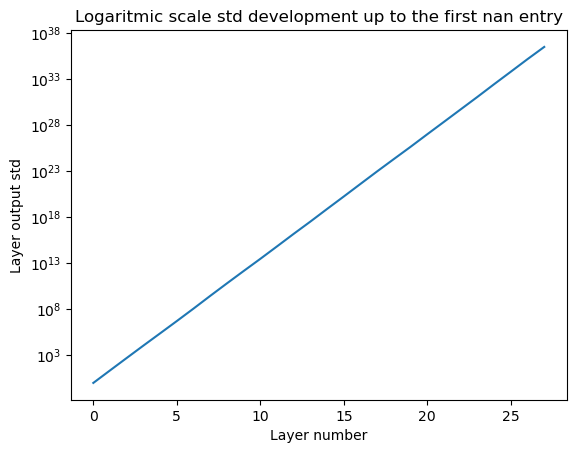

In [237]:
# T1 - Section 1
torch.manual_seed(seed)
x = torch.randn(512)
simple_normalization=[x.std()]
no_nan=True
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
    simple_normalization.append(x.std())
    if no_nan and torch.sum(torch.isnan(x))>0:
        print("First layer of nans is "+str(i+1))
        no_nan=False
print(x.mean(), x.std())
plt.semilogy(np.arange(101),simple_normalization)
plt.xlabel('Layer number')
plt.ylabel('Layer output std')
a=plt.title('Logaritmic scale std development up to the first nan entry')

### T1 - Section 1 explanation
As we saw in lecture 4, when using a normal weight initialization, the variance of a normal sampled input increases going deeper into the MLP. Thus, the probabilty of sampling a value out of float's maximum value increases. 

In [238]:
# T1 - Section 2
torch.manual_seed(seed)
x = torch.randn(512)
n_iterations=10000
emp_mean_samples=[]
emp_std_samples=[]
emp_sqr_mean_samples=[]
for i in range(n_iterations):
    a = torch.randn(512, 512)
    y = a @ x
    emp_mean_samples.append(torch.mean(y))
    emp_std_samples.append(torch.std(y,correction=0))
    emp_sqr_mean_samples.append(torch.mean(y**2))
emp_mean=torch.mean(torch.Tensor(emp_mean_samples))  
emp_std=torch.mean(torch.Tensor(emp_std_samples))
emp_root_sqr=torch.sqrt(torch.mean(torch.Tensor(emp_sqr_mean_samples)))
print("Empirical mean is {:.2f}".format(emp_mean))
print("Empirical std value is {:.2f}".format(emp_std))
print("Empirical square root is {:.2f}".format(emp_root_sqr))
print("Relative std to square root error is {:.2f}%".format(torch.abs(emp_std-emp_root_sqr)/emp_std*100))
print("Relative estimated value to square root error is {:.2f}%".format(torch.abs(np.sqrt(512)-emp_root_sqr)/emp_std*100))

Empirical mean is 0.01
Empirical std value is 22.34
Empirical square root is 22.38
Relative std to square root error is 0.15%
Relative estimated value to square root error is 1.12%


End vector mean is -0.0386 and its std is 1.1485


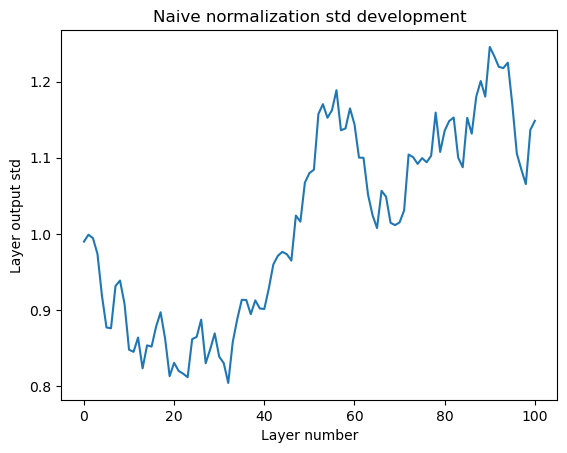

In [ ]:
# T1 - Section 3
torch.manual_seed(seed)
x = torch.randn(512)
sug_normalization=[x.std()]
no_nan=True
for i in range(100):
    a = torch.randn(512, 512)/np.sqrt(512.0)
    x = a @ x
    sug_normalization.append(x.std())
    if no_nan and torch.sum(torch.isnan(x))>0:
        print("First layer of nans is "+str(i+1))
        no_nan=False
print("End vector mean is {:.4f} and its std is {:.4f}".format(x.mean(), x.std()))
plt.plot(np.arange(len(sug_normalization)),sug_normalization)
plt.xlabel('Layer number')
plt.ylabel('Layer output std')
a=plt.title('Naive normalization std development')

### T1 - Section 3 answer
As can be seen in the plot above the std of the activation map is close to 1.0 even in deeper layers, unlike the std explosion we saw using the normal initialization.

End vector mean is -0.0097 and its std is 0.9758


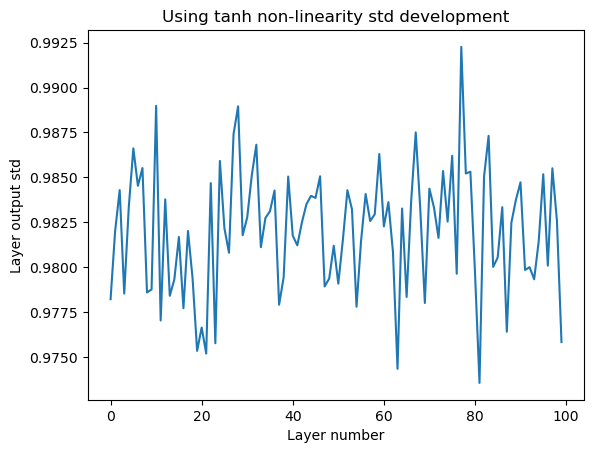

In [ ]:
# T1 - Section 4
torch.manual_seed(seed)
x = torch.randn(512)
tanh_added=[]
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
    x=torch.tanh(x)
    tanh_added.append(x.std())
print("End vector mean is {:.4f} and its std is {:.4f}".format(x.mean(), x.std()))
plt.plot(np.arange(len(tanh_added)),tanh_added)
plt.xlabel('Layer number')
plt.ylabel('Layer output std')
a=plt.title('Using tanh non-linearity std development')

Text(0.5, 1.0, 'Layers output histograms')

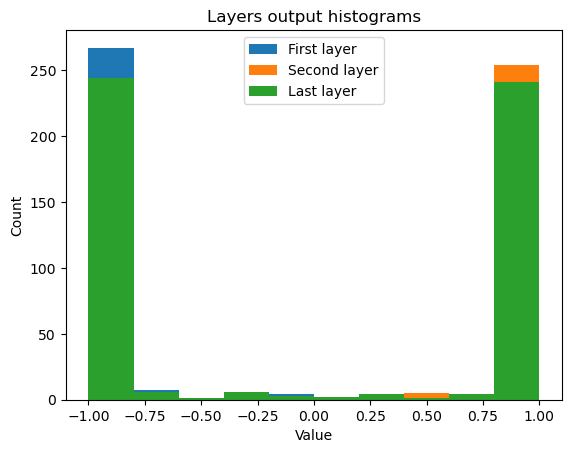

In [ ]:
# T1 - Section 4
torch.manual_seed(seed)
a=plt.hist(torch.tanh(torch.randn(512, 512)@torch.randn(512)))
a=plt.hist(torch.tanh(torch.randn(512, 512)@torch.tanh(torch.randn(512, 512)@torch.randn(512))))
a=plt.hist(x)
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend(['First layer','Second layer','Last layer'])
plt.title('Layers output histograms')

### T1 - Section 4 answer
* The mean and std are almost 0 and 1 at the end of the network.   
* Also the std throughout the network activation maps is 1.   
  
tanh squeezes the fully connected layers' real results into the [-1,1] interval. Thus we insure the std wont explode.    
In the last plot we can see that empirically the output of the layers is almost equally destributed into {-1,1}(tanh is saturated). Indeed the mean of such distribution is ~0.0 and its std is ~1.0(distance of -1 and 1 from 0 is 1).

End vector mean is -0.0009 and its std is 0.0738


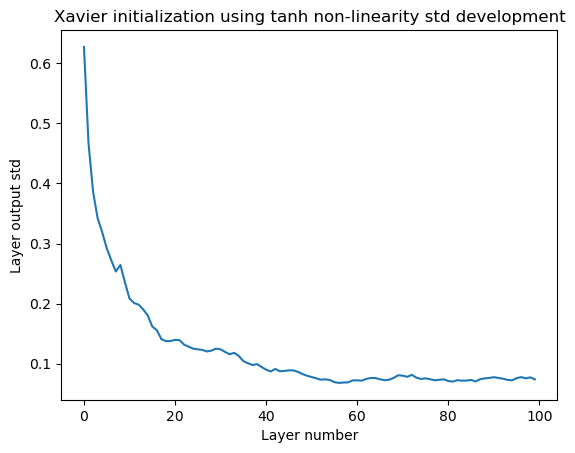

In [ ]:
# T1 - Section 5
def xavier_init(fan_in,fan_out):
    return np.sqrt(6/(fan_in+fan_out))*(2*torch.rand(fan_out,fan_in)-1)
torch.manual_seed(seed)
x = torch.randn(512)
xavier=[]
for i in range(100):
    a = xavier_init(512, 512)
    x = a @ x
    x=torch.tanh(x)
    xavier.append(x.std())
print("End vector mean is {:.4f} and its std is {:.4f}".format(x.mean(), x.std()))
plt.plot(np.arange(len(xavier)),xavier)
plt.xlabel('Layer number')
plt.ylabel('Layer output std')
a=plt.title('Xavier initialization using tanh non-linearity std development')

End vector mean is 0.6667 and its std is 0.9518


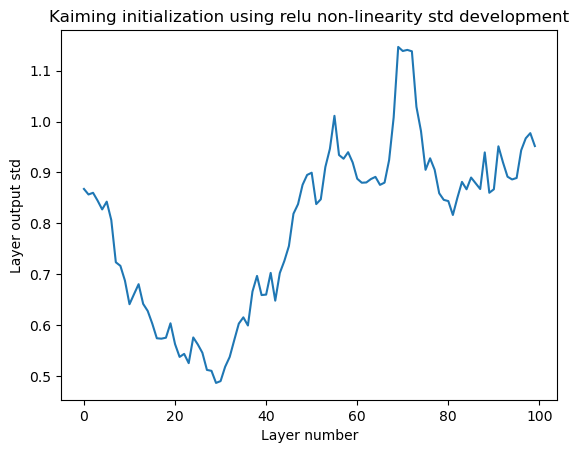

In [ ]:
# T1 - Section 6 
def kaiming_init(fan_in,fan_out):
    return np.sqrt(2/fan_in)*torch.randn(fan_out,fan_in)
torch.manual_seed(seed)
x = torch.randn(512)
xavier=[]
for i in range(100):
    a = kaiming_init(512, 512)
    x = a @ x
    x=torch.relu(x)
    xavier.append(x.std())
print("End vector mean is {:.4f} and its std is {:.4f}".format(x.mean(), x.std()))
plt.plot(np.arange(len(xavier)),xavier)
plt.xlabel('Layer number')
plt.ylabel('Layer output std')
a=plt.title('Kaiming initialization using relu non-linearity std development')

End vector mean is 0.0000 and its std is 0.0000


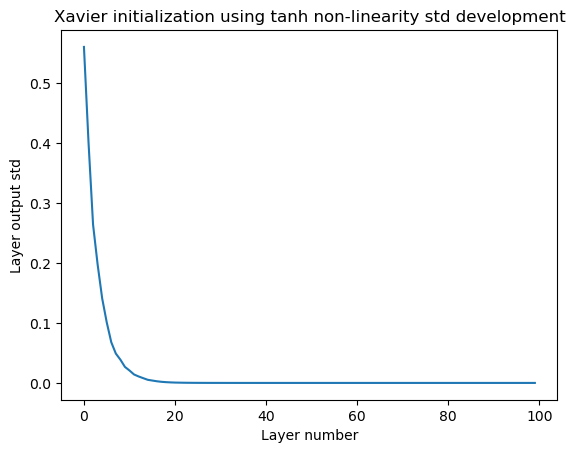

In [ ]:
# T1 - Section 6 Trying xavier_init with relu
torch.manual_seed(seed)
x = torch.randn(512)
xavier=[]
for i in range(100):
    a = xavier_init(512, 512)
    x = a @ x
    x=torch.relu(x)
    xavier.append(x.std())
print("End vector mean is {:.4f} and its std is {:.4f}".format(x.mean(), x.std()))
plt.plot(np.arange(len(xavier)),xavier)
plt.xlabel('Layer number')
plt.ylabel('Layer output std')
a=plt.title('Xavier initialization using tanh non-linearity std development')

### T1 - Section 6 answer
The plot above shows empirically that using xavier initialization with relu activations leads to depth-wise std decay.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - MLP-based Deep Classifer
---
In this task you are going to design and train your first neural network for classification.

For this task, we will use the "<a href="https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope">MAGIC Gamma Telescope Data Set"</a>. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. 

Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (**signal**) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (**background**).

Our data has 10 features and 2 classes (signal and background).

1. Load the MAGIC dataset sored in `magic04.data` and display the first 5 features (just run the cell).
2. Separate the data to train, validation and test, reserve 10% of the data for validation and 20% for test.
3. Perform pre-processing steps of your choice and convert the class label from `str` to `int` (for example, `y_train = np.array([0 if y_train[i] == 'g' else 1 for i in range(len(y_train))]).astype(np.int)`).
4. Train a Logistic Regression model from `sklearn` as a baseline for our neural network (only for this section use both the train and validation sets for training the classifier). **Print the test accuracy**.
5. Convert the `numpy` arrays to `torch` tensors with `TensorDataset` as done in the tutorial.
6. Design a **MLP** to classify the data. Optimize the hyper-parameters of your model using the accuracy on the validation set, and when you are satisfied with the model train it on both the train and validation sets and evaluate it on the test set. **You need to reach at least 85% accuracy on the test set, and 87% for a full grade**.
    * You have a free choice of architecture, optimizer, learning scheduler, initialization, regularization and activations.
    * The loss criterion is binary cross entropy: `nn.BCEWithLogitsLoss()` (performs `sigmoid` for you) or `nn.BCELoss` (you need to apply `sigmoid` on the network output yourself).
    * In a Markdown block, write down the chosen architectures and all the hyper-parameters.
        * Make sure to describe any design choice that you used to improve the performance (e.g. if you used a certain regularization or layer, mention it and describe why you think it helped).
    * **Plot** the loss curves (and any oter statistic you want) as a function of epochs/iterations. **Print** the final performance.
    * **Print** the test accuracy.
7. Pick **2** initializations of your choosing and change the initialization of the linear layers and re-train the model (with the same optimal hyper-parameters you found). You can pick an initialization of your choosing from : https://pytorch.org/docs/stable/nn.init.html . See example below how to use. **Print** the change in accuracy for both changes (you should end up with 3 results - original, `init 1` and `init 2`).

In [239]:
#T2 Section 1
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data = pd.read_csv("./magic04.data", names=col_names)
X = data[feature_names]
Y = data['class']
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [240]:
#T2 Section 2
# separate to train, test
torch.manual_seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [241]:
#T2 Section 3
# pre-processing and converting labels to integers
scaler = StandardScaler().fit(X_train)
X_train_prep = scaler.transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)
y_train_np = np.array([0 if y_train[i] == 'g' else 1 for i in range(len(y_train))]).astype(int).reshape([-1,1])
y_val_np = np.array([0 if y_val[i] == 'g' else 1 for i in range(len(y_val))]).astype(int).reshape([-1,1])
y_test_np = np.array([0 if y_test[i] == 'g' else 1 for i in range(len(y_test))]).astype(int).reshape([-1,1])

In [ ]:
#T2 Section 2
# separate to train, test
torch.manual_seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [246]:
#T2 Section 4
# training a Logistic Regression baseline - complete the code with your variables
logstic_model = LogisticRegression(solver='lbfgs')
y_pred = logstic_model.fit(np.vstack([X_train_prep,X_val_prep]), np.vstack([y_train_np,y_val_np]).ravel()).predict(X_train_prep)
print("Number of mislabeled points %d out of %d total points."% ((y_train_np != y_pred.reshape(-1,1)).sum(), X_train.shape[0]))
print("Logistic Regression Model accuracy =" , logstic_model.score(X_test_prep, y_test_np))

Number of mislabeled points 2789 out of 13314 total points.
Logistic Regression Model accuracy = 0.7931125131440588


In [ ]:
#T2 Section 5
# create TensorDataset from numpy arrays
magic_tensor_train_ds =TensorDataset(torch.tensor(X_train_prep, dtype=torch.float), torch.tensor(y_train_np, dtype=torch.float))

In [ ]:
#T2 Section 6
class MagicMLP(nn.Module):
    # notice that we inherit from nn.Module
    def __init__(self, input_dim, output_dim, hidden_dim=256,init_dict={}):
        super(MagicMLP, self).__init__()
        self.hidden = nn.Sequential(nn.Linear(input_dim, hidden_dim),
                                    nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim),
                                    nn.ReLU(),
                                    nn.Linear(hidden_dim, hidden_dim),
                                    nn.ReLU(),)
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        if init_dict and 'method' in init_dict.keys() and init_dict['method']!='default_initialization':
            self.init_weights(init_dict)
    def init_weights(self,init_dict):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                if init_dict['method']=='orthogonal':
                    nn.init.orthogonal_(m.weight)
                    # Not changing the bias default initialization
                elif init_dict['method']=='trunc_normal':
                    mean=init_dict['mean'] if 'mean' in init_dict.keys() else 0.0
                    std=init_dict['std'] if 'std' in init_dict.keys() else 0.005
                    a=init_dict['a'] if 'a' in init_dict.keys() else -2.0
                    b=init_dict['b'] if 'b' in init_dict.keys() else 2.0
                    nn.init.trunc_normal_(m.weight,mean, std, a, b)
                    if hasattr(m, 'bias'):
                        nn.init.trunc_normal_(m.bias,mean, std, a, b)
                elif init_dict['method']=='kaiming_normal':
                    # nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='leaky_relu', a=math.sqrt(5))
                    mode= init_dict['mode'] if 'mode' in init_dict.keys() else 'fan_out'
                    nonlinearity=init_dict['nonlinearity'] if 'nonlinearity' in init_dict.keys() else 'relu'
                    a=init_dict['a'] if 'a' in init_dict.keys() else 0
                    nn.init.kaiming_normal_(m.weight, mode=mode,nonlinearity=nonlinearity,a=a)
                    if hasattr(m, 'bias'):
                        nn.init.kaiming_normal_(m.weight, mode=mode,nonlinearity=nonlinearity,a=a)
                elif init_dict['method']=='normal':
                    mean=init_dict['mean'] if 'mean' in init_dict.keys() else 0.0
                    std=init_dict['std'] if 'std' in init_dict.keys() else 0.005
                    nn.init.normal_(m.weight, mean, std)
                    if hasattr(m, 'bias'):
                        nn.init.normal_(m.weight, mean, std)
    def forward(self, x):
        return self.output_layer(self.hidden(x))

In [ ]:
#T2 Section 6
def train(device,criterion,num_features,output_dim,hyperparams,visited=False,best_val_acc=-1.0,best_model_wts=[]):
    # model
    if not ('init_params' in hyperparams.keys()):
        hyperparams['init_params']={}
    model = MagicMLP(num_features, output_dim,hyperparams['hidden_dim'],hyperparams['init_params']).to(device)
    # optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=hyperparams['learning_rate'],weight_decay=hyperparams['weight_decay'])
    scheduler = MultiStepLR(optimizer, milestones=hyperparams['milestones'], gamma=hyperparams['gamma'])
    magic_tensor_train_dataloader = DataLoader(magic_tensor_train_ds, batch_size=hyperparams['batch_size'], shuffle=True)
    train_loss=[]
    val_loss=[]
    val_acc=[]
    # training loop for the model
    for epoch in range(hyperparams['num_epochs']):
        model.train()  # change the mode to training, activating layers like DropOut and BatchNorm, if there are any
        epoch_losses = []
        for features, targets in magic_tensor_train_dataloader:
            # send data to device
            features = features.to(device)
            targets = targets.to(device)
            # forward pass
            output = model(features)  # calls model.forward(features)
            # loss
            loss = criterion(output, targets)
            # backward pass
            optimizer.zero_grad()  # clean the gradients from previous iteration, clears the `tensor.grad` field (tensor.grad=0)
            loss.backward()  # autograd backward to calculate gradients, assigns the `tensor.grad` field (e.g., tensor.grad=0.27)
            optimizer.step() # apply update to the weights, applies the gradient update rule of the optimizer (param=param - lr * grad)
            epoch_losses.append(loss.item())
        scheduler.step() 
        if epoch % hyperparams['save_point_epoch_interval'] == 0 or epoch==(hyperparams['num_epochs']-1):
            cur_val_loss,cur_val_acc=calc_accuracy(model,criterion,
                                    torch.tensor(X_val_prep, dtype=torch.float, device=device),
                                    torch.tensor(y_val_np, dtype=torch.float, device=device))
            train_loss.append(np.mean(epoch_losses))
            val_loss.append(cur_val_loss.item())
            val_acc.append(cur_val_acc.item())
            if cur_val_acc>best_val_acc:
                best_val_acc=copy.deepcopy(cur_val_acc)
                best_model_wts=copy.deepcopy(model.state_dict())
                visited=True
            print(f'count: {count} epoch: {epoch} loss: {train_loss[-1]:.4f} val_acc:{cur_val_acc:.2f}%')
    return train_loss,val_loss,val_acc,visited,best_val_acc,best_model_wts

In [ ]:
#T2 Section 6
def calc_accuracy(model,criterion,X,y):
    model.eval()
    with torch.no_grad():
        outputs = model(X)
        return criterion(outputs,y),torch.sum((outputs>0.0)==y)/len(y)*100

In [ ]:
#T2 Section 6
# model, hyper-paramerters and training
# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# loss criterion
criterion = nn.BCEWithLogitsLoss()
state='train_manual_hyperparams'
hyperparams['save_point_epoch_interval']=50
if state=='train_with_validation':
    max_count=50
else:
    max_count=1
best_val_acc=-1.0
best_model_wts=[]
best_hyperparams={}
torch.manual_seed(seed)
np.random.seed(seed)
for count in range(max_count):
    visited=False
    num_features=X_train_prep.shape[1]
    output_dim = 1
    #hyper-paramerters
    hyperparams={}
    if state=='train_with_validation':
        hyperparams['batch_size'] = 2**np.random.randint(4,11)
        hyperparams['num_epochs'] = 100*np.random.randint(1,6)
        hyperparams['hidden_dim'] = 2**np.random.randint(6,12)
        #optimizer hyper-paramerters
        hyperparams['learning_rate'] = 10**np.random.uniform(-0.5,-4)
        hyperparams['weight_decay']=10**np.random.uniform(-4,-0.5)
        #scheduler hyper-paramerters
        number_of_milestones=np.random.randint(0,4)
        hyperparams['milestones']=[]
        min_milestone=1
        for i in range(number_of_milestones):
            hyperparams['milestones'].append(np.random.randint(min_milestone,hyperparams['num_epochs']-number_of_milestones+i+1))
            min_milestone=hyperparams['milestones'][-1]+1
        hyperparams['gamma']=10**np.random.uniform(-0.5,-2)
    elif os.path.isfile('best_hyperparams.pkl') and state=='train_upload_hyperparams':
        with open('best_hyperparams.pkl') as f: 
            hyperparams = pickle.load(f)
    elif state=='train_manual_hyperparams':
        hyperparams['batch_size'] =32
        hyperparams['num_epochs'] =200
        hyperparams['hidden_dim'] =1024 
        #optimizer hyper-paramerters
        hyperparams['learning_rate'] =0.008699216730396673 
        hyperparams['weight_decay']=0.0002585400845113414
        #scheduler hyper-paramerters
        hyperparams['milestones']=[89]
        hyperparams['gamma']=0.10460035161857559
    train_loss,val_loss,val_acc,visited,best_val_acc,best_model_wts=train(device,criterion,num_features,output_dim,
                                                                            hyperparams,visited,best_val_acc,best_model_wts)
    if visited:
        best_hyperparams=copy.deepcopy(hyperparams)
        best_model_train_loss=copy.deepcopy(train_loss)
        best_model_val_loss=copy.deepcopy(val_loss)
        best_model_val_acc=copy.deepcopy(val_acc)
if state=='train_with_validation':
    if os.path.isfile('best_hyperparams.pkl'):
        os.rename('best_hyperparams.pkl', 'former_best_hyperparams.pkl')
    with open('best_hyperparams.pkl', 'wb')  as f:  
        pickle.dump([best_hyperparams], f)

count: 0 epoch: 0 loss: 0.4689 val_acc:87.38%
count: 0 epoch: 50 loss: 0.2439 val_acc:88.28%
count: 0 epoch: 100 loss: 0.1893 val_acc:88.70%
count: 0 epoch: 150 loss: 0.1485 val_acc:88.01%
count: 0 epoch: 199 loss: 0.1247 val_acc:88.22%


Train set loss is 0.1754. Train set accuracy is 92.92%
Validation set loss is 0.3124. Validation set accuracy is 88.70%
Test set loss is 0.3427.Test set accuracy is 87.38%


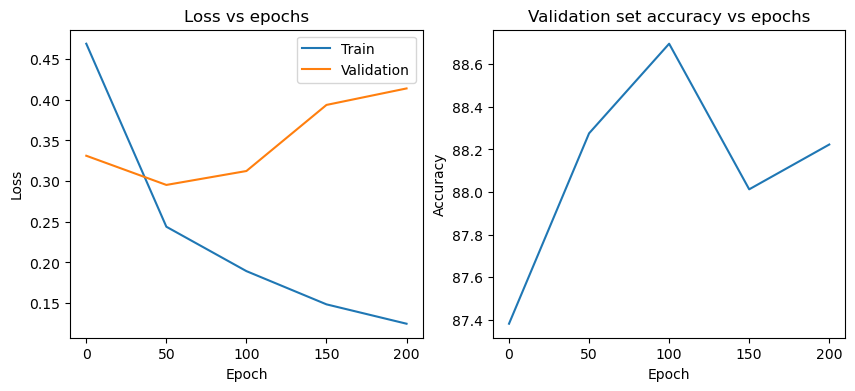

In [ ]:
#T2 Section 6
model = MagicMLP(num_features, output_dim,best_hyperparams['hidden_dim']).to(device)
model.load_state_dict(best_model_wts)
test_loss,test_acc=calc_accuracy(model,criterion,
                            torch.tensor(X_test_prep, dtype=torch.float, device=device),
                            torch.tensor(y_test_np, dtype=torch.float, device=device))
train_loss,train_acc=calc_accuracy(model,criterion,
                            torch.tensor(X_train_prep, dtype=torch.float, device=device),
                            torch.tensor(y_train_np, dtype=torch.float, device=device))
idx=np.argmax(best_model_val_acc)
print(f'Train set loss is {train_loss:.4f}. Train set accuracy is {train_acc:.2f}%')
print(f'Validation set loss is {best_model_val_loss[idx]:.4f}. Validation set accuracy is {best_model_val_acc[idx]:.2f}%')
print(f'Test set loss is {test_loss:.4f}.Test set accuracy is {test_acc:.2f}%')
fig=plt.figure(figsize=(10, 4))
ax1=fig.add_subplot(1,2,1)
ax1.plot((np.arange(len(best_model_train_loss)))*best_hyperparams['save_point_epoch_interval'],best_model_train_loss)
ax1.plot((np.arange(len(best_model_val_loss)))*best_hyperparams['save_point_epoch_interval'],best_model_val_loss)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs epochs')
ax1.legend(['Train','Validation'])
ax2=fig.add_subplot(1,2,2)
ax2.plot((np.arange(len(best_model_val_acc)))*best_hyperparams['save_point_epoch_interval'],best_model_val_acc)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
a=ax2.set_title('Validation set accuracy vs epochs')

### T2 - Section 6 answer
* The chosen architecture is identical to the architecture used in tutorial 5(MLP), meaning 4 FC layers with RELU as an activation function.  
* While training, once in 50 epoches the accuracy of the validation set is calculated for the current suggested parameters. The parameters with the best validation set accuracy among these are the output to the training process. This helps with the networks generalization capabilities.  
* The validated hyperparameters are:
  * Batch size- Only size 32. We saw that small mini-batches can be considered as implicit regularization.
  * Epoch number 200.
  * Number of neurons in the FC hidden layers is 1024.
  * Learning rate ~0.0087.
  * Weight decay factor ~0.00258. The training dataset is quite large but still we saw that such regularization can be used to fasten the convergence rate or to make up for labling noise.
  * Learning rate decay epochs(Milestones) are set to [89](Only one LR decay is done at epoch 89).
  * Learning rate decay factor ~0.1046.
* No validation was performed on the number of MLP layer or the type of activation used.


In [ ]:
#T2 Section 7
torch.manual_seed(seed)
hyperparams=best_hyperparams
hyperparams['init_params']={'method':'orthogonal'}
train_loss1,cur_val_loss1,val_acc1,visited,best_val_acc1,best_model_wts1=train(device,criterion,num_features,output_dim,hyperparams)

count: 0 epoch: 0 loss: 0.4315 val_acc:87.07%
count: 0 epoch: 50 loss: 0.2652 val_acc:88.54%
count: 0 epoch: 100 loss: 0.2171 val_acc:88.80%
count: 0 epoch: 150 loss: 0.1796 val_acc:87.75%
count: 0 epoch: 199 loss: 0.1493 val_acc:86.54%


In [ ]:
#T2 Section 7
torch.manual_seed(seed)
hyperparams=best_hyperparams
hyperparams['init_params']={'method':'trunc_normal'}
train_loss2,cur_val_loss2,val_acc2,visited,best_val_acc2,best_model_wts2=train(device,criterion,num_features,output_dim,hyperparams)

count: 0 epoch: 0 loss: 0.3925 val_acc:85.86%
count: 0 epoch: 50 loss: 0.2555 val_acc:87.17%
count: 0 epoch: 100 loss: 0.2129 val_acc:88.75%
count: 0 epoch: 150 loss: 0.1680 val_acc:88.59%
count: 0 epoch: 199 loss: 0.1420 val_acc:88.17%


In [ ]:
#T2 Section 7
model = MagicMLP(num_features, output_dim,best_hyperparams['hidden_dim']).to(device)
model.load_state_dict(best_model_wts1)
test_loss1,test_acc1=calc_accuracy(model,criterion,
                            torch.tensor(X_test_prep, dtype=torch.float, device=device),
                            torch.tensor(y_test_np, dtype=torch.float, device=device))
model.load_state_dict(best_model_wts2)
test_loss2,test_acc2=calc_accuracy(model,criterion,
                            torch.tensor(X_test_prep, dtype=torch.float, device=device),
                            torch.tensor(y_test_np, dtype=torch.float, device=device))
print(f'Original initialization test set accuracy is {test_acc:.2f}%')                            
print(f'Orthogonal initialization test set accuracy is {test_acc1:.2f}%')
print(f'Truncated normal initialization test set accuracy is {test_acc2:.2f}%')

Original initialization test set accuracy is 87.38%
Orthogonal initialization test set accuracy is 87.91%
Truncated normal initialization test set accuracy is 87.93%


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - Design a CNN
---
In this task you are going to design a deep convolutional neural network to classify 10 classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute) - **The Imagenette Dataset**.

* 10 classes, 1 for each object.
* 9469 images for training and 3925 for testing (70/30 separation).
* We will use a downscaled version where the images are resized to $64\times 64$ resolution.

<center><img src="https://storage.googleapis.com/tfds-data/visualization/fig/imagenette-160px-v2-1.0.0.png" style="height:300px"></center>

1. Load the the Imagenette dataset with PyTorch using `torchvision.datasets.Imagenette(
    root='./datasets', split='train', size='160px', download=True, transform=transform_train)`, where `split` is either `'train'` or `'val'`, you can read more here: https://pytorch.org/vision/main/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette . Use the `transform` parameter to resize the images to $64 \times 64$ (for train, validation and test) and convert the data to tensors, e.g.,
   
   <code>transform_test=transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),])</code>
    
   Display 5 images from the train set.

   <a href="https://gist.github.com/kevinzakka/d33bf8d6c7f06a9d8c76d97a7879f5cb">Train, Validation and Test Split for torchvision Datasets</a>
3. Design a Convolutional Neural Network (CNN) to classify classes from the images.
    * You are **not allowed** to use `BatchNorm` in your architecture, but can use any other normalization (`GroupNorm`, `LayerNorm`, and etc..).
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network. What is the model size in MegaBytes (MB)? (see the convolution tutorial). **Print** these numbers.
4. Train the classifier (preferably on a GPU - use Colab for this part if you don't have a GPU).
    * **DO NOT USE ANY IMAGE AUGMENTATIONS IN THIS PART** (You can still use `Normalize` if you wish, but no cropping, flipping and etc...).
    * You are not allowed to use pre-trained models (i.e., no transfer learning, only learning from scratch).
    * Describe the hyper-parameters of the model (batch size, epochs, optimizer, learning rate, scheduler....). How did you tune your model? Did you use a validation set to tune the model?
    * What is the final accuracy on the test set? **Print** it.
        * You need to reach at least 73% accuracy in this section, and 78% for maximum points in section 5.
    * **Plot** the loss curves (and any other statistic you calculate) as a function of epochs/iterations.
6. For the trained classifier, what is the accuracy on the test set when each test image is added a small noise $a=(0.05, 0.01, 0.005)$: $$ \text{image} + a \times \mathcal{N}(0, 1).$$ **Print** the result for each value of $a$.
7. Retrain the classifier, but this time use data augementations of your choosing. Briefly explain what augmentation you chose and how it works. Did the test accuracy improve? **Print** the result.
    * You can use transformations available in `torchvision.transforms` as shown in the tutorial.
    * You are welcome to use <a href="https://kornia.github.io/">`kornia`</a> for the augmentations (**2 points bonus**, maximal grade is still 100).
    * **Plot** the loss curves (and any other statistic you want) as a function of epochs/iterations.

In [ ]:
#T3 Section 1
num_workers=0
normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )
transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
            normalize
        ])
train_addr=os.path.join('./datasets', 'train')
test_addr=os.path.join('./datasets', 'test')
train_dataset=torchvision.datasets.Imagenette(root=train_addr, split='train', size='160px', download=(not os.path.isdir(train_addr)), transform=transform)
valid_dataset=torchvision.datasets.Imagenette(root=train_addr, split='train', size='160px', download=(not os.path.isdir(train_addr)), transform=transform)
test_dataset=torchvision.datasets.Imagenette(root=test_addr, split='val', size='160px', download=(not os.path.isdir(test_addr)), transform=transform)

In [ ]:
#T3 Section 1
lbl_dict = {
    0:'Tench',
    1:'English springer',
    2:'Cassette player',
    3:'Chain saw',
    4:'Church',
    5:'French horn',
    6:'Garbage truck',
    7:'Gas pump',
    8:'Golf ball',
    9:'Parachute'
}

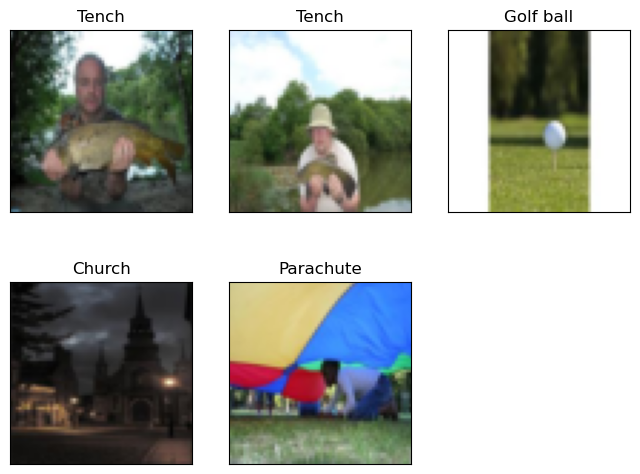

In [ ]:
#T3 Section 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(seed)
transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor()
        ])
samp_dataset=torchvision.datasets.Imagenette(root=train_addr, split='train', size='160px', download=(not os.path.isdir(train_addr)), transform=transform)
sample_loader = torch.utils.data.DataLoader(
    samp_dataset, batch_size=5, shuffle=True,
    num_workers=0, pin_memory=device.type=='cuda',
)
data_iter = iter(sample_loader)
images, labels = next(data_iter)
labels=itemgetter(*labels.detach().cpu().numpy())(lbl_dict)
X = images.numpy().transpose([0, 2, 3, 1])
fig=plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    ax=fig.add_subplot((len(labels)+3-1)//3,3,i+1)
    ax.imshow(X[i])
    ax.set_title(labels[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [164]:
#T3 Section 2
class ImageNetteCNN(nn.Module):
    """CNN for the ImageNette Datset"""

    def __init__(self):
        """CNN Builder."""
        super(ImageNetteCNN, self).__init__()
        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            # `paading=1` is the same as `padding='same'` for 3x3 kernels size
            nn.GroupNorm(4,32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.GroupNorm(4,128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.GroupNorm(8,256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  

            # Conv Layer block 4
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.GroupNorm(16,512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.05),
            nn.Linear(8192, 1024),  
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)  
        
        # flatten - can also use nn.Flatten() in __init__() instead
        x = x.view(x.size(0), -1) 
        
        # fc layer
        x = self.fc_layer(x) 

        return x

In [248]:
#T3 Section 2
dummy_model = ImageNetteCNN()
# how many weights (trainable parameters) we have in our model?
num_trainable_params = sum([p.numel() for p in dummy_model.parameters() if p.requires_grad])
print("num trainable weights: ", num_trainable_params)
# calculate the model size on disk
param_size = 0
for param in dummy_model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in dummy_model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()
size_all_mb = (param_size + buffer_size) / 1024 ** 2
print(f"model size: {size_all_mb:.2f} MB")

num trainable weights:  13587466
model size: 51.83 MB


### T3 - Section 2 answer
* The network is a modified version of tutorial 6 CifarCNN. Added 2 more CNN layers(8 CNN layers followed by 3 FC layers).
* The non-linear activations used troughout the network are all classic Relu layers.
* The input size is an NX3X64X64 tensor and the output is a NX10 tensor(10 is the nuber of classes in imagenette dataset).
* First FC layer input size depends on the size of the input images and 4 max pooling each halfing input maps dimentions(Notice that the CNN layers used don't change the their input maps(conv3x3 with pad1)). The max pooling operations total rescale factor is $2^4=16$ and the input is 64X64 thus the maps at the end of the convolution part are 4X4 maps(with 512 channels).
Thus the input of the first FC layer is 4X4X512=8192. The rest of FC layers dimensions are inherited from the source network. 
* The number of network parameters and their memory footprint are printed in the former code box.

In [174]:
#T3 Section 3
# function to calcualte accuracy of the model
def calculate_accuracy(model, criterion,dataloader, device,std=0.0):
    model.eval() # put in evaluation mode,  turn off Dropout, BatchNorm uses learned statistics
    total_correct = 0
    total_images = 0
    running_loss=0.0
    confusion_matrix = np.zeros([10, 10], int)
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            images=images+std*torch.randn_like(images)
            labels = labels.to(device)
            outputs = model(images)
            loss =criterion(outputs, labels)
            running_loss += loss.data.item()
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i, l in enumerate(labels):
                confusion_matrix[l.item(), predicted[i].item()] += 1 
    model_loss=running_loss/len(dataloader)
    model_accuracy = total_correct / total_images * 100
    return model_accuracy,model_loss, confusion_matrix

In [201]:
#T3 Section 3
def trainImageNetteCNN(device,criterion,train_loader,valid_loader,hyperparams,visited=False,best_val_acc=-1.0,best_model_wts=[],aug_list=AugmentationSequential()):
    # build our model and send it to the device
    model = ImageNetteCNN().to(device) # no need for parameters as we alredy defined them in the class
    # optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=hyperparams['learning_rate'],weight_decay=hyperparams['weight_decay'])
    # scheduler
    scheduler = MultiStepLR(optimizer, milestones=hyperparams['milestones'], gamma=hyperparams['gamma'])
    train_loss=[]
    train_acc=[]
    val_loss=[]
    val_acc=[]
    for epoch in range(1, hyperparams['num_epochs'] + 1):
        model.train()  # put in training mode, turn on Dropout, BatchNorm uses batch's statistics
        running_loss = 0.0
        epoch_time = time.time()
        for i, data in enumerate(train_loader, 0):
            # get the inputs
            inputs, labels = data
            # send them to device
            inputs = inputs.to(device)
            labels = labels.to(device)
            # augmentation with `kornia` happens here inputs = aug_list(inputs)
            if len(aug_list)>0:
                inputs = aug_list(inputs)
            # forward + backward + optimize
            outputs = model(inputs)  # forward pass
            loss = criterion(outputs, labels)  # calculate the loss
            # always the same 3 steps
            optimizer.zero_grad()  # zero the parameter gradients
            loss.backward()  # backpropagation
            optimizer.step()  # update parameters
            # print statistics
            running_loss += loss.data.item()
        scheduler.step() 
        # Calculate training/test set accuracy of the existing model
        cur_train_acc,_, _ = calculate_accuracy(model,criterion, train_loader, device)
        cur_val_acc,cur_val_loss, _ = calculate_accuracy(model,criterion, valid_loader, device)
        train_loss.append(running_loss/len(train_loader))
        train_acc.append(cur_train_acc)
        val_loss.append(cur_val_loss)
        val_acc.append(cur_val_acc)
        if cur_val_acc>best_val_acc:
            best_val_acc=copy.deepcopy(cur_val_acc)
            best_model_wts=copy.deepcopy(model.state_dict())
            visited=True
        log = "Epoch: {} | Loss: {:.4f} | Training accuracy: {:.3f}% | Validation accuracy: {:.3f}% | ".format(epoch, train_loss[-1], train_acc[-1], val_acc[-1])
        epoch_time = time.time() - epoch_time
        log += "Epoch Time: {:.2f} secs".format(epoch_time)
        print(log)
    return train_loss,train_acc,val_loss,val_acc,visited,best_val_acc,best_model_wts

In [165]:
#T3 Section 3
# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# loss criterion
criterion = nn.CrossEntropyLoss()  # accepts 'logits' - unnormalized scores (no need to apply `softmax` manually)
state='train_manual_hyperparams'
if state=='train_with_validation':
    max_count=20
else:
    max_count=1
best_val_acc=-1.0
best_model_wts=[]
best_hyperparams={}
torch.manual_seed(seed)
np.random.seed(seed)
for count in range(max_count):
    gc.collect()
    torch.cuda.empty_cache()
    visited=False
    #hyper-paramerters
    hyperparams={}
    if state=='train_with_validation':
        hyperparams['valid_percentage_of_train']=np.random.uniform(0.08,0.12)
        hyperparams['batch_size'] = 2**np.random.randint(7,9)
        hyperparams['num_epochs'] = 10
        #optimizer hyper-paramerters
        hyperparams['learning_rate'] = 10**np.random.uniform(-4.5,-3.7)
        hyperparams['weight_decay']=10**np.random.uniform(-7,-5)
        #scheduler hyper-paramerters
        number_of_milestones=np.random.randint(1,3)
        hyperparams['milestones']=[]
        min_milestone=1
        for i in range(number_of_milestones):
            hyperparams['milestones'].append(np.random.randint(min_milestone,hyperparams['num_epochs']-number_of_milestones+i+1))
            min_milestone=hyperparams['milestones'][-1]+1
        hyperparams['gamma']=10**np.random.uniform(-0.8,-1.2)
    elif os.path.isfile('best_hyperparams_ImageNetteCNN.pkl') and state=='train_upload_hyperparams':
        with open('best_hyperparams_ImageNetteCNN.pkl') as f: 
            hyperparams = pickle.load(f)
    elif state=='train_manual_hyperparams':
        #hyperparameters
        hyperparams['valid_percentage_of_train']=0.1
        hyperparams['batch_size'] =128
        hyperparams['num_epochs'] =30
        #optimizer hyper-paramerters
        hyperparams['learning_rate'] =1e-4
        hyperparams['weight_decay']=0.0
        #scheduler hyper-paramerters
        hyperparams['milestones']=[10,20]
        hyperparams['gamma']=0.1
    print(hyperparams)
    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(np.floor(hyperparams['valid_percentage_of_train'] * num_train))
    np.random.shuffle(indices)
    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=hyperparams['batch_size'], sampler=train_sampler,
        num_workers=num_workers, pin_memory=device.type=='cuda',
    )
    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=hyperparams['batch_size'], sampler=valid_sampler,
        num_workers=num_workers, pin_memory=device.type=='cuda',
    )
    print(f'Count {count}')
    train_loss,train_acc,val_loss,val_acc,visited,best_val_acc,best_model_wts=trainImageNetteCNN(device,criterion,train_loader,valid_loader,
                                                                            hyperparams,visited,best_val_acc,best_model_wts)
    
    if visited:
        best_hyperparams=copy.deepcopy(hyperparams)
        best_model_train_loss=copy.deepcopy(train_loss)
        best_model_train_acc=copy.deepcopy(train_acc)
        best_model_val_loss=copy.deepcopy(val_loss)
        best_model_val_acc=copy.deepcopy(val_acc)
if state=='train_with_validation':
    if os.path.isfile('best_hyperparams_ImageNetteCNN.pkl'):
        if os.path.isfile('former_best_hyperparams_ImageNetteCNN.pkl'):
            os.remove('former_best_hyperparams_ImageNetteCNN.pkl')
        os.rename('best_hyperparams_ImageNetteCNN.pkl', 'former_best_hyperparams_ImageNetteCNN.pkl')
    with open('best_hyperparams_ImageNetteCNN.pkl', 'wb')  as f:  
        pickle.dump([best_hyperparams], f)

{'valid_percentage_of_train': 0.1, 'batch_size': 128, 'num_epochs': 30, 'learning_rate': 0.0001, 'weight_decay': 0.0, 'milestones': [10, 20], 'gamma': 0.1}
Count 0
Epoch: 1 | Loss: 2.0473 | Training accuracy: 39.094% | Validation accuracy: 38.584% | Epoch Time: 29.05 secs
Epoch: 2 | Loss: 1.6154 | Training accuracy: 52.223% | Validation accuracy: 49.260% | Epoch Time: 31.87 secs
Epoch: 3 | Loss: 1.3348 | Training accuracy: 57.585% | Validation accuracy: 52.748% | Epoch Time: 31.68 secs
Epoch: 4 | Loss: 1.1763 | Training accuracy: 64.484% | Validation accuracy: 58.245% | Epoch Time: 32.61 secs
Epoch: 5 | Loss: 1.0188 | Training accuracy: 70.949% | Validation accuracy: 64.693% | Epoch Time: 31.85 secs
Epoch: 6 | Loss: 0.8588 | Training accuracy: 78.083% | Validation accuracy: 68.288% | Epoch Time: 44.79 secs
Epoch: 7 | Loss: 0.7542 | Training accuracy: 78.658% | Validation accuracy: 68.816% | Epoch Time: 40.91 secs
Epoch: 8 | Loss: 0.6416 | Training accuracy: 84.313% | Validation accurac

The test set accuracy is 73.35


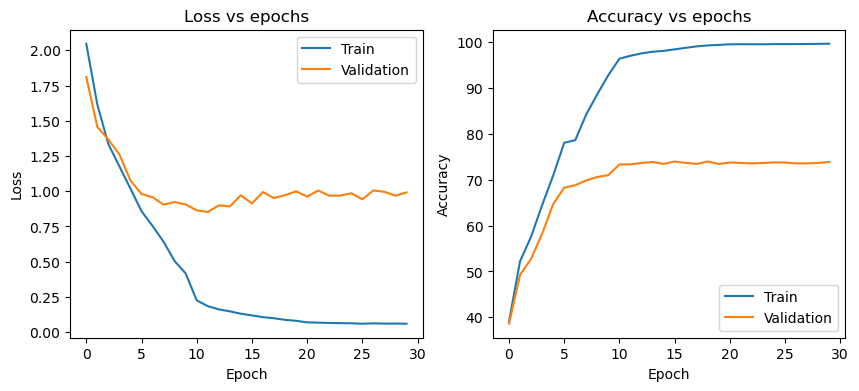

In [175]:
#T3 Section 3
model = ImageNetteCNN().to(device)
model.load_state_dict(best_model_wts)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=best_hyperparams['batch_size'], shuffle=True,
    num_workers=num_workers, pin_memory=device.type=='cuda',
)
cur_test_acc,_, _ = calculate_accuracy(model,criterion, test_loader, device)
print(f'The test set accuracy is {cur_test_acc:.2f}')
fig=plt.figure(figsize=(10, 4))
ax1=fig.add_subplot(1,2,1)
ax1.plot((np.arange(len(best_model_train_loss))),best_model_train_loss)
ax1.plot((np.arange(len(best_model_val_loss))),best_model_val_loss)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs epochs')
ax1.legend(['Train','Validation'])
ax2=fig.add_subplot(1,2,2)
ax2.plot((np.arange(len(best_model_train_acc))),best_model_train_acc)
ax2.plot((np.arange(len(best_model_val_acc))),best_model_val_acc)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(['Train','Validation'])
a=ax2.set_title('Accuracy vs epochs')

### T3 - Section 3 answer
* Hyperparameters list
  * Network architecture
    * Number of CNN layers, their filters size and number of channels.
    * Activation function used.
    * Location of dropout layers and their dropping probability.
    * Number of hidden FC layers and their size.
    * The actual network modification with respect to tutorial 6's CIFAR10CNN is adding another convolution block and changing the normalization to GroupNorm and updating the input FC Dropout probability to 0.05.  
  * Size of validation set.
  * Batch size.
  * Number of epoches.
  * Optimizer
    * Type and it's parameters.
    * Learning rate.
    * Weight decay.
  * Scheduler
    * Type and it's parameters.
    * Using MultiStepLR tuning the milestone epochs of learning rate updates and their diminishing factor.  
* All the hyperparameters were tuned using network babysitting(Initialized using tutorial 6's network and hyperparameters). We tried validation using random sampling around the baby-sitting suggested hyperparameters. These trails havn't led the performance to a noticeable seed consistent improvement.   
* The final accuracy on the test set, accuracy and loss curves are shown in the code box above.

For noise of standard deviation 0.000 the test accuracy is 73.35
For noise of standard deviation 0.005 the test accuracy is 73.32
For noise of standard deviation 0.010 the test accuracy is 73.32
For noise of standard deviation 0.050 the test accuracy is 73.35
For noise of standard deviation 0.080 the test accuracy is 72.94


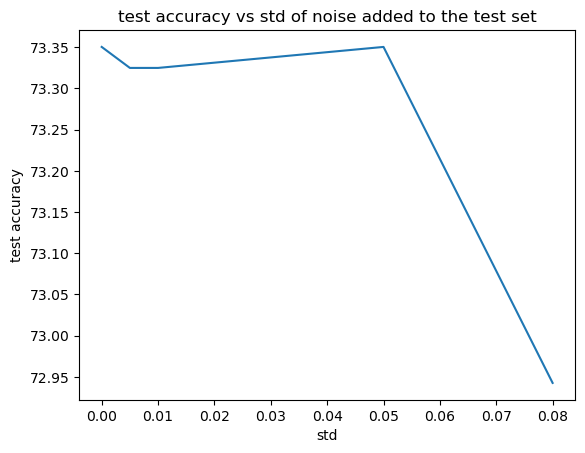

In [191]:
#T3 Section 4
torch.manual_seed(seed)
noise_std=np.array([0.0,0.005,0.01,0.05,0.08])
test_accuracy_noise=np.zeros_like(noise_std)
for i in range(len(noise_std)):
    test_accuracy_noise[i],_, _ = calculate_accuracy(model,criterion, test_loader, device,noise_std[i])
    print(f'For noise of standard deviation {noise_std[i]:.3f} the test accuracy is {test_accuracy_noise[i]:.2f}')
plt.plot(noise_std,test_accuracy_noise)
plt.title('test accuracy vs std of noise added to the test set')
plt.xlabel('std')
a=plt.ylabel('test accuracy')

### T3 - Section 4 answer
We can see in the figure above that the net accuracy is pretty robust with respect to the suggested std-s. Adding a bit more noise(std=0.08) caused a more destinct loss of accuracy. This kind generalization seems hard for the network.

In [235]:
#T3 Section 5
# define a sequence of augmentations
gc.collect()
torch.cuda.empty_cache()
torch.manual_seed(seed)
aug_list = AugmentationSequential(
    K.RandomHorizontalFlip(),
    #K.ColorJiggle(0.1, 0.1, 0.1, 0.1, p=0.9),
    K.RandomAffine(20.0, [0.1, 0.1], [0.7, 1.2], 20.0, p=0.9),
    K.RandomGaussianNoise(std=0.08),
    #K.RandomPerspective(0.1, p=0.9),
    same_on_batch=False,
)
hyperparams=best_hyperparams
hyperparams['num_epochs']=100
hyperparams['milestones']=[30,80]
train_loss_aug,train_acc_aug,val_loss_aug,val_acc_aug,visited_aug,best_val_acc_aug,best_model_wts_aug=trainImageNetteCNN(device,criterion,train_loader,valid_loader,
                                                                                                hyperparams,aug_list=aug_list)

Epoch: 1 | Loss: 2.1728 | Training accuracy: 28.405% | Validation accuracy: 27.696% | Epoch Time: 34.38 secs
Epoch: 2 | Loss: 1.9215 | Training accuracy: 41.159% | Validation accuracy: 39.641% | Epoch Time: 35.59 secs
Epoch: 3 | Loss: 1.7339 | Training accuracy: 45.770% | Validation accuracy: 44.609% | Epoch Time: 37.51 secs
Epoch: 4 | Loss: 1.5465 | Training accuracy: 55.919% | Validation accuracy: 54.334% | Epoch Time: 36.14 secs
Epoch: 5 | Loss: 1.4343 | Training accuracy: 54.875% | Validation accuracy: 52.643% | Epoch Time: 36.05 secs
Epoch: 6 | Loss: 1.3412 | Training accuracy: 60.084% | Validation accuracy: 59.619% | Epoch Time: 35.44 secs
Epoch: 7 | Loss: 1.2636 | Training accuracy: 62.384% | Validation accuracy: 59.408% | Epoch Time: 35.11 secs
Epoch: 8 | Loss: 1.1724 | Training accuracy: 65.247% | Validation accuracy: 60.888% | Epoch Time: 35.99 secs
Epoch: 9 | Loss: 1.1030 | Training accuracy: 71.688% | Validation accuracy: 66.490% | Epoch Time: 36.02 secs
Epoch: 10 | Loss: 1

The test set accuracy is 78.14


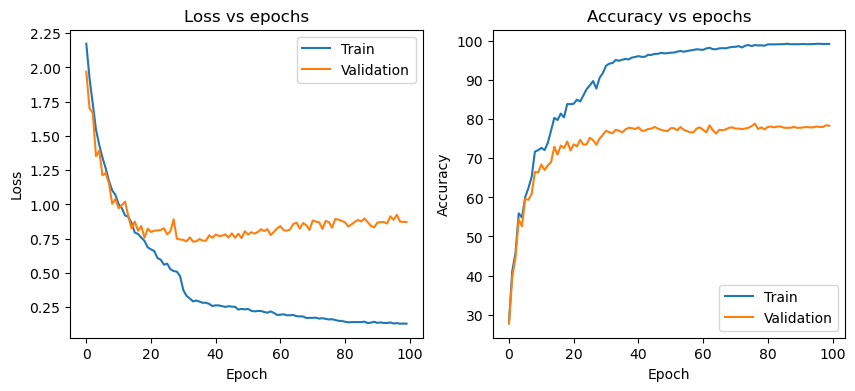

In [236]:
#T3 Section 5
model = ImageNetteCNN().to(device)
model.load_state_dict(best_model_wts_aug)
cur_test_acc,_, _ = calculate_accuracy(model,criterion, test_loader, device)
print(f'The test set accuracy is {cur_test_acc:.2f}')
fig=plt.figure(figsize=(10, 4))
ax1=fig.add_subplot(1,2,1)
ax1.plot((np.arange(len(train_loss_aug))),train_loss_aug)
ax1.plot((np.arange(len(val_loss_aug))),val_loss_aug)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs epochs')
ax1.legend(['Train','Validation'])
ax2=fig.add_subplot(1,2,2)
ax2.plot((np.arange(len(train_acc_aug))),train_acc_aug)
ax2.plot((np.arange(len(val_acc_aug))),val_acc_aug)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(['Train','Validation'])
a=ax2.set_title('Accuracy vs epochs')

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/